In [ ]:
#   Tema projekta:
#       Procena vrednosti fudbalera sa Transfermarkt-a primenom regresionih modela
#   Deo projekta:
#       EDA analiza podataka 2
#   Autori:
#       Miloš Sirar, IN 3/2020, sirar.in3.2020@uns.ac.rs
#       Vasilije Zeković, IN 4/2020, zekovic.in4.2020@uns.ac.rs
#   Predmet: 
#       Mašinsko učenje 1
#   Profesor:
#       Tatjana Lončar-Turukalo
#   Asistenti:
#       Tijana Nosek
#       Ivan Lazić

In [45]:
import numpy as np
import pandas as pd
import warnings

In [46]:
df_all = pd.read_csv("all_data_new_2.csv")

In [47]:
df_all["market_value_on_valuation_date"].describe()

count    4.187300e+04
mean     9.646029e+06
std      1.506791e+07
min      1.000000e+04
25%      9.000000e+05
50%      4.000000e+06
75%      1.200000e+07
max      2.000000e+08
Name: market_value_on_valuation_date, dtype: float64

In [48]:
df_all.isna().sum()

valuation_date                                               0
height_in_cm                                                 0
position                                                     0
sub_position                                                 0
foot                                                         0
market_value_on_valuation_date                               0
games_played_in_domestic_competition_on_valuation_date       0
average_minutes_in_domestic_competition_on_valuation_date    0
goals_in_domestic_competition_on_valuation_date              0
assists_in_domestic_competition_on_valuation_date            0
yellow_cards_in_domestic_competition_on_valuation_date       0
red_cards_in_domestic_competition_on_valuation_date          0
games_played_in_european_competition_on_valuation_date       0
average_minutes_in_european_competition_on_valuation_date    0
goals_in_european_competition_on_valuation_date              0
assists_in_european_competition_on_valuation_date      

In [49]:
df_all['valuation_date']

0         3
1         4
2         6
3         7
4         9
         ..
41868    28
41869    29
41870    30
41871    30
41872    34
Name: valuation_date, Length: 41873, dtype: int64

In [50]:
df_all.describe()

,valuation_date,height_in_cm,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,yellow_cards_in_domestic_competition_on_valuation_date,red_cards_in_domestic_competition_on_valuation_date,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_value_on_valuation_year,old,citizienship_tier,club_domestic_competition_on_valuation_date_tier
count,41873.000000,41873.000000,4.187300e+04,41873.000000,41873.000000,41873.000000,41873.000000,41873.000000,41873.000000,41873.000000,41873.000000,41873.000000,41873.000000,41873.000000,41873.000000,4.187300e+04,41873.000000,41873.000000,41873.000000
mean,22.366298,183.173620,9.646029e+06,6.473599,42.818390,0.710434,0.548277,0.892078,0.021016,0.716022,14.522056,0.085497,0.068660,0.099157,0.001648,1.798729e+08,23.502973,4.174337,2.852459
std,8.357220,6.766804,1.506791e+07,6.877162,37.401523,1.687252,1.195943,1.443971,0.146568,1.662083,30.330373,0.447841,0.344923,0.390232,0.040561,2.203048e+08,3.938944,1.134377,0.415836
min,1.000000,163.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+04,14.000000,1.000000,1.000000
25%,16.000000,178.000000,9.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.444167e+07,20.000000,4.000000,3.000000
50%,24.000000,184.000000,4.000000e+06,5.000000,49.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.194167e+07,23.000000,5.000000,3.000000
75%,29.000000,188.000000,1.200000e+07,11.000000,80.700000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.494583e+08,26.000000,5.000000,3.000000
max,35.000000,206.000000,2.000000e+08,45.000000,120.000000,24.000000,15.000000,13.000000,2.000000,14.000000,120.000000,10.000000,6.000000,6.000000,1.000000,1.164008e+09,42.000000,5.000000,3.000000


In [51]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41873 entries, 0 to 41872
Data columns (total 22 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   valuation_date                                             41873 non-null  int64  
 1   height_in_cm                                               41873 non-null  float64
 2   position                                                   41873 non-null  object 
 3   sub_position                                               41873 non-null  object 
 4   foot                                                       41873 non-null  object 
 5   market_value_on_valuation_date                             41873 non-null  int64  
 6   games_played_in_domestic_competition_on_valuation_date     41873 non-null  float64
 7   average_minutes_in_domestic_competition_on_valuation_date  41873 non-null  float64
 8   goals_

In [52]:
from scipy.stats import skew, kurtosis 

print('Koef. asimetrije: %.2f' % skew(df_all["market_value_on_valuation_date"]))
print('Koef. spljoštenosti: %.2f' % kurtosis(df_all["market_value_on_valuation_date"]))

Koef. asimetrije: 3.43
Koef. spljoštenosti: 18.00


In [53]:
df_all["market_value_on_valuation_date"]

0        17000000
1        18000000
2        15000000
3        14000000
4        14000000
           ...   
41868     1200000
41869     2200000
41870     3000000
41871     2500000
41872      350000
Name: market_value_on_valuation_date, Length: 41873, dtype: int64

In [54]:
less_than_20_mil = df_all["market_value_on_valuation_date"].loc[df_all["market_value_on_valuation_date"] <= 20000000].count()
_20_to_50_mil = df_all["market_value_on_valuation_date"].loc[(df_all["market_value_on_valuation_date"] <= 50000000) & (df_all["market_value_on_valuation_date"] > 20000000)].count()
_50_to_200_mil = df_all["market_value_on_valuation_date"].loc[df_all["market_value_on_valuation_date"] > 50000000].count()
total_valuations = df_all['market_value_on_valuation_date'].count()

print('Valuacija koje iznose manje od 20 mil u procentima ima: ', less_than_20_mil / total_valuations, ', tacnije: ', less_than_20_mil, ' valuacija')
print('Valuacija koje iznose manje od 20 mil do 50 mil u procentima ima: ', _20_to_50_mil / total_valuations, ', tacnije: ', _20_to_50_mil, ' valuacija')
print('Valuacija koje iznose manje od 50 mil do 200 mil u procentima ima: ', _50_to_200_mil / total_valuations, ', tacnije: ', _50_to_200_mil, ' valuacija')

Valuacija koje iznose manje od 20 mil u procentima ima:  0.8700355837890765 , tacnije:  36431  valuacija
Valuacija koje iznose manje od 20 mil do 50 mil u procentima ima:  0.1042915482530509 , tacnije:  4367  valuacija
Valuacija koje iznose manje od 50 mil do 200 mil u procentima ima:  0.025672867957872613 , tacnije:  1075  valuacija


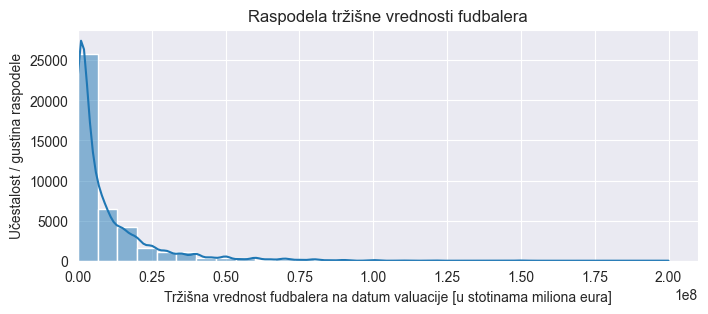

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize=(8,3))
sns.histplot(df_all['market_value_on_valuation_date'], bins=30, kde=True)
plt.xlim(left=0)


plt.title('Raspodela tržišne vrednosti fudbalera')
plt.xlabel('Tržišna vrednost fudbalera na datum valuacije [u stotinama miliona eura]')
plt.ylabel('Učestalost / gustina raspodele')
plt.grid(True)
plt.show()

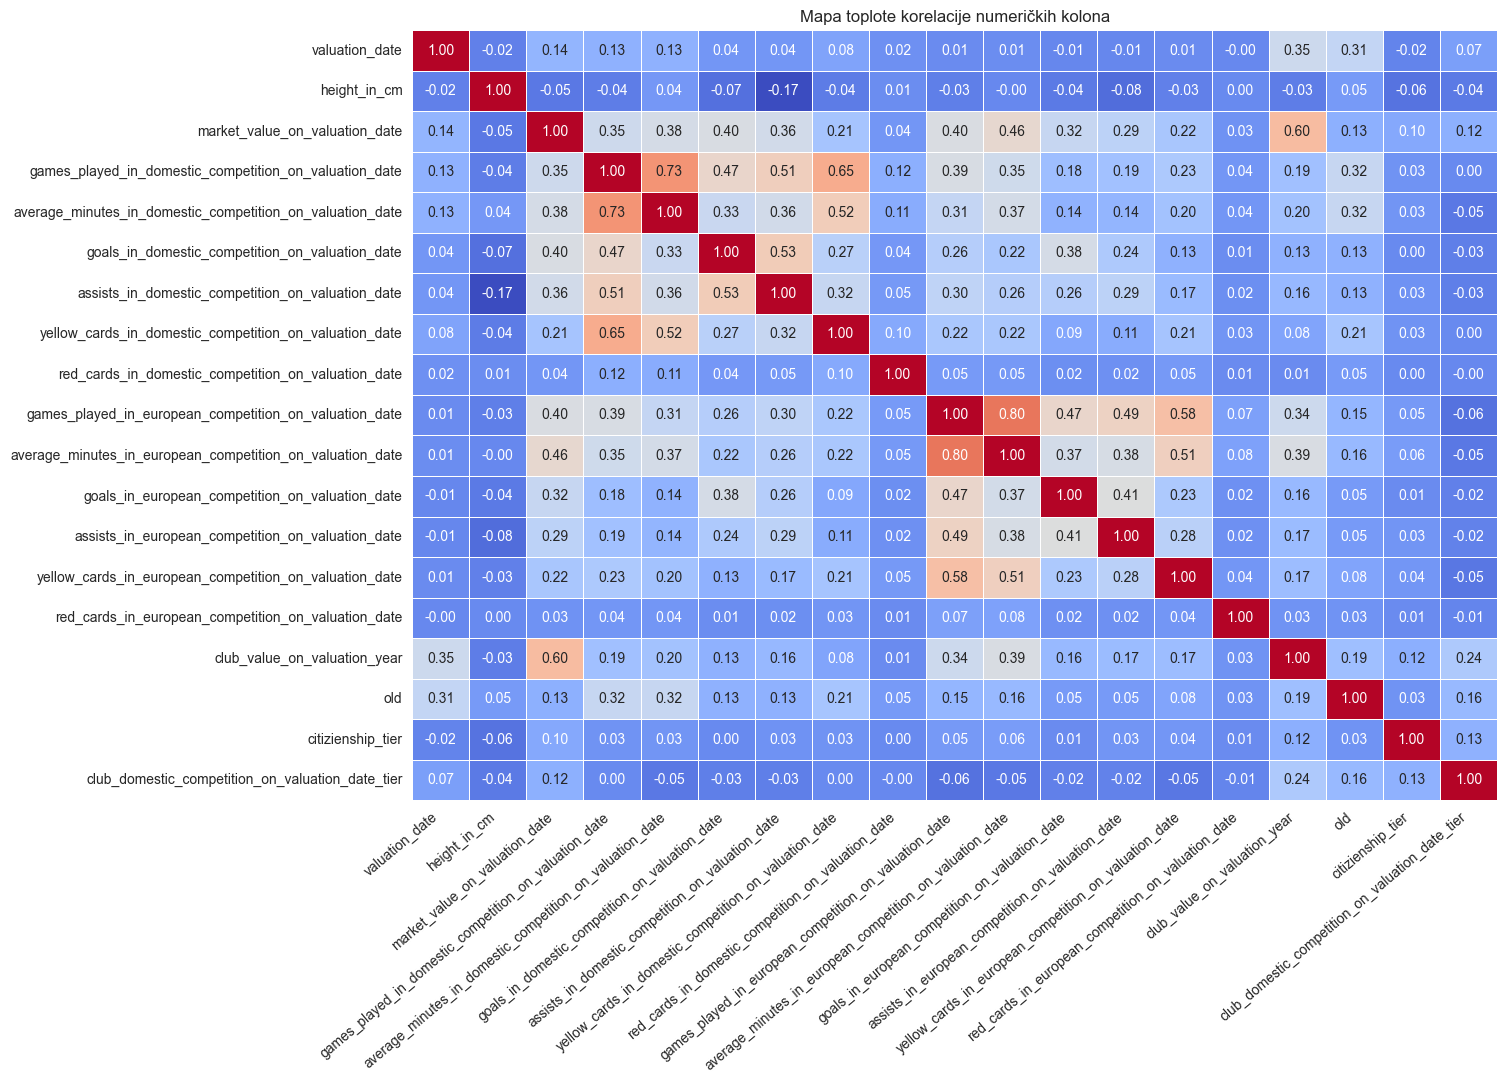

In [69]:
numerical_columns = df_all.select_dtypes(include=['float64', 'int64'])

correlation = numerical_columns.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=False, linewidths=0.5, xticklabels=True, yticklabels=True)

plt.xticks(rotation=40, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right',fontsize=10)  # No rotation for y labels to make them horizontal

plt.title('Mapa toplote korelacije numeričkih kolona')

plt.show()

In [13]:
numeričke_kolone = df_all.select_dtypes(include=['float64', 'int64'])

korelacija = numeričke_kolone.corr()

jaca_korelacija = (korelacija.abs() > 0.7) & (korelacija.abs() < 1)

jaci_parovi = {}

for kolona in jaca_korelacija.columns:
    jaci_parovi[kolona] = list(jaca_korelacija.index[jaca_korelacija[kolona]])

for kolona, korelirane_kolone in jaci_parovi.items():
    if korelirane_kolone:
        print(f"Par korelisanih obeležja za '{kolona}': {korelirane_kolone}")


Par korelisanih obeležja za 'games_played_in_domestic_competition_on_valuation_date': ['average_minutes_in_domestic_competition_on_valuation_date']
Par korelisanih obeležja za 'average_minutes_in_domestic_competition_on_valuation_date': ['games_played_in_domestic_competition_on_valuation_date']
Par korelisanih obeležja za 'games_played_in_european_competition_on_valuation_date': ['average_minutes_in_european_competition_on_valuation_date']
Par korelisanih obeležja za 'average_minutes_in_european_competition_on_valuation_date': ['games_played_in_european_competition_on_valuation_date']


In [14]:
df_all.isna().sum()

valuation_date                                               0
height_in_cm                                                 0
position                                                     0
sub_position                                                 0
foot                                                         0
market_value_on_valuation_date                               0
games_played_in_domestic_competition_on_valuation_date       0
average_minutes_in_domestic_competition_on_valuation_date    0
goals_in_domestic_competition_on_valuation_date              0
assists_in_domestic_competition_on_valuation_date            0
yellow_cards_in_domestic_competition_on_valuation_date       0
red_cards_in_domestic_competition_on_valuation_date          0
games_played_in_european_competition_on_valuation_date       0
average_minutes_in_european_competition_on_valuation_date    0
goals_in_european_competition_on_valuation_date              0
assists_in_european_competition_on_valuation_date      

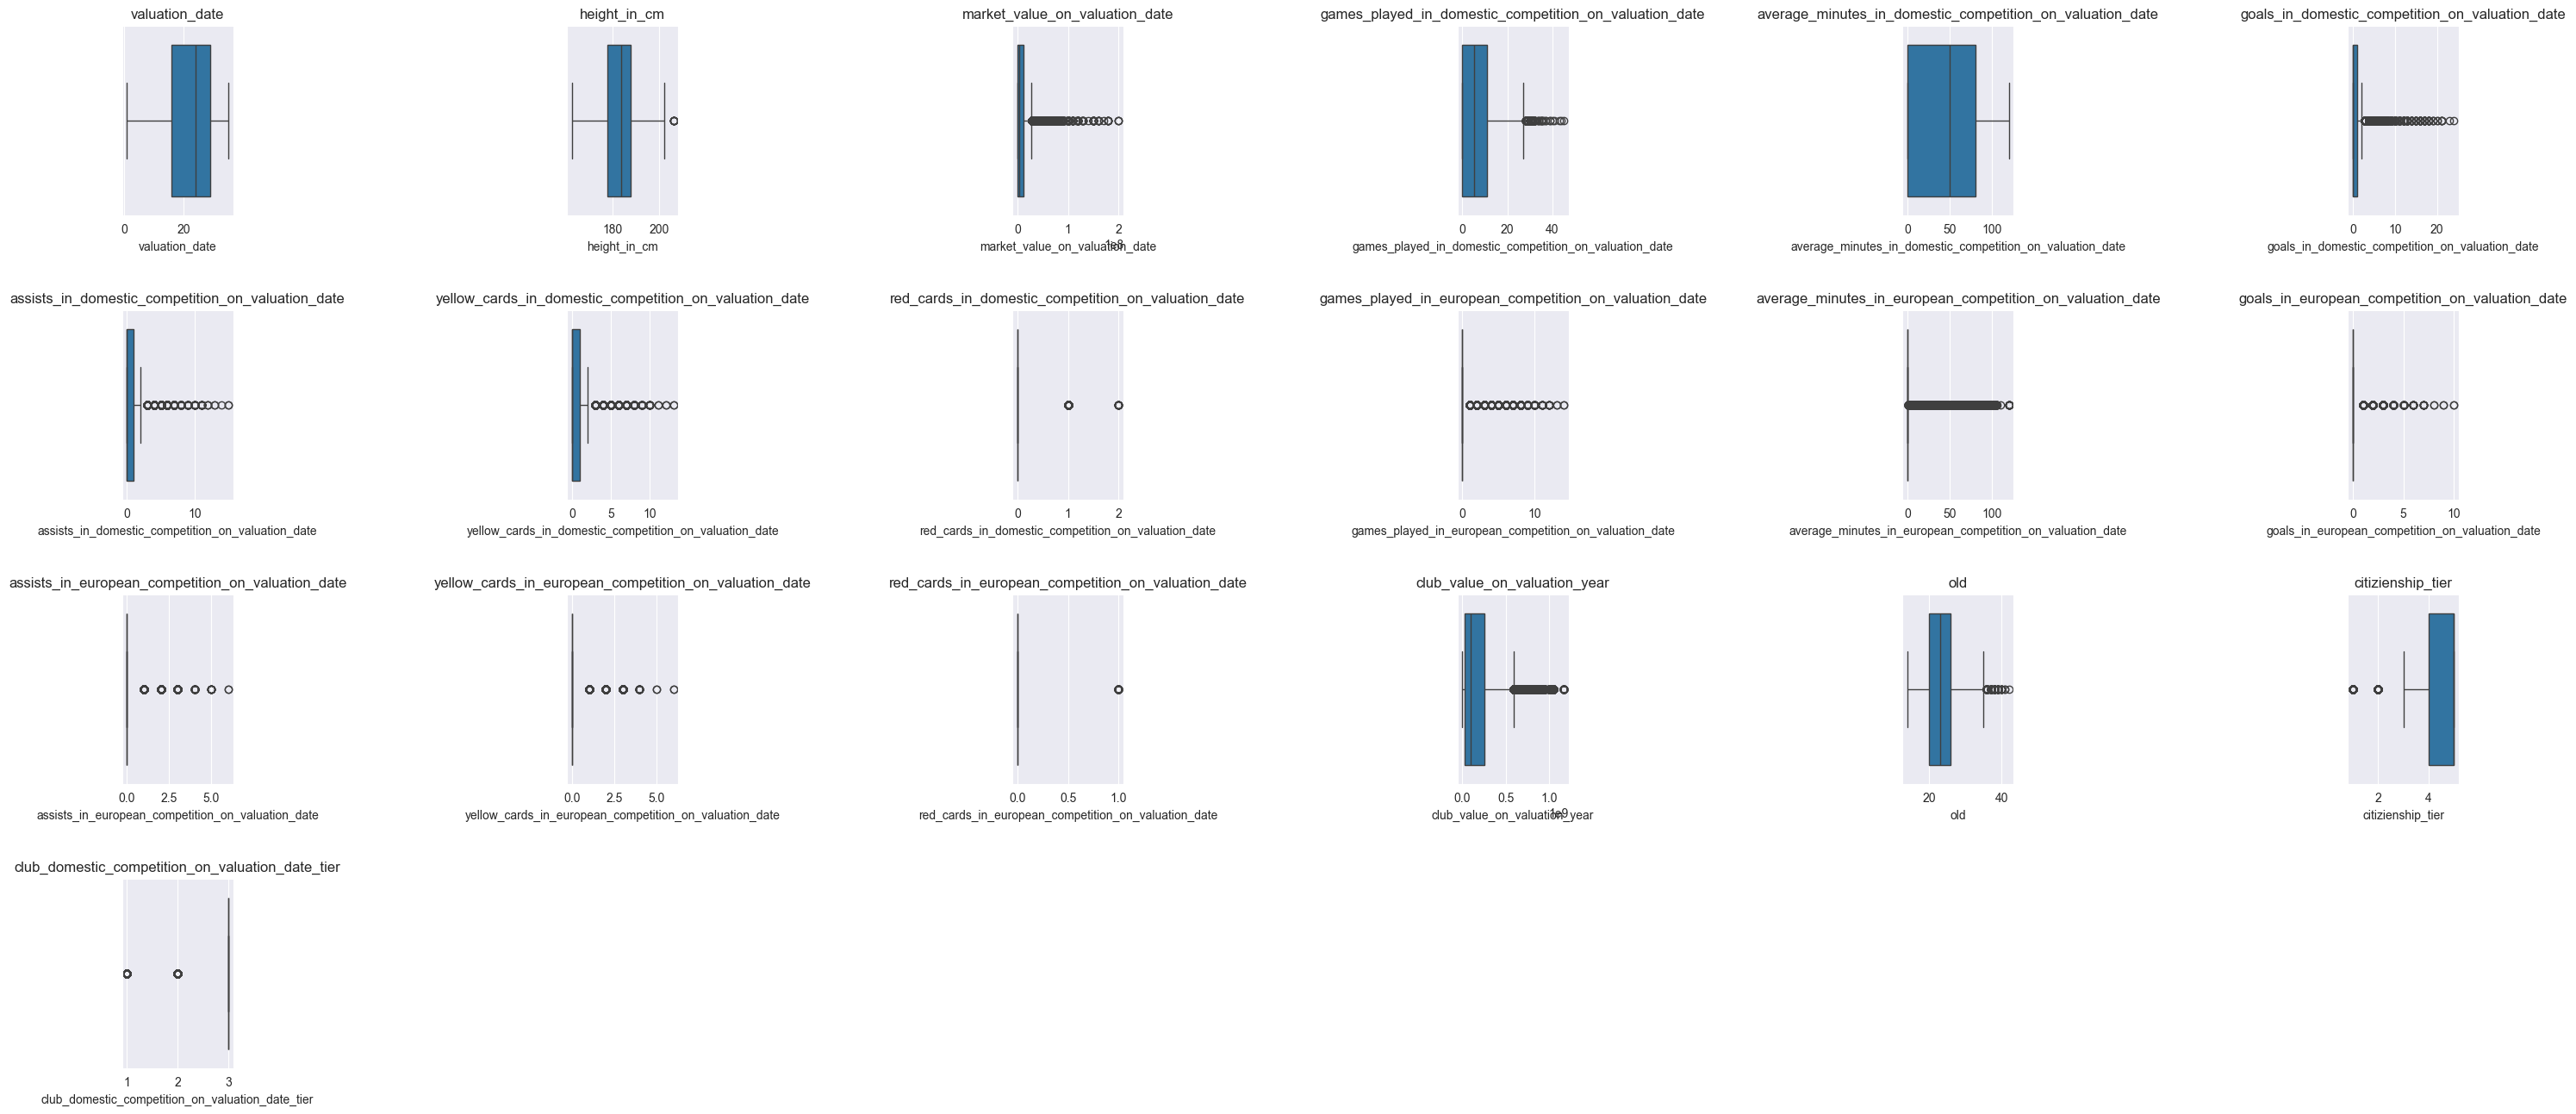

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt

numeričke_kolone = df_all.select_dtypes(include=['float64', 'int64'])

broj_redova = 5
broj_kolona = 6
plt.figure(figsize=(35, 20))

for i, kolona in enumerate(numeričke_kolone.columns, 1):
    plt.subplot(broj_redova, broj_kolona, i)
    sb.boxplot(x=df_all[kolona])
    plt.title(kolona)

plt.subplots_adjust(hspace=0.5, wspace=3)

plt.show()

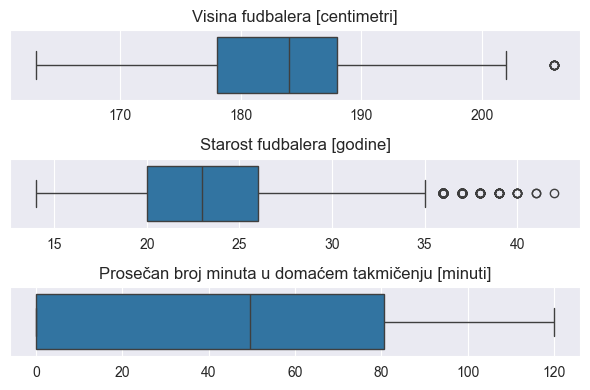

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(6, 4))

axes[0].set_title("Visina fudbalera [centimetri]")
sns.boxplot(x=df_all["height_in_cm"], ax=axes[0])
axes[0].set_xlabel("")  

axes[1].set_title("Starost fudbalera [godine]")
sns.boxplot(x=df_all["old"], ax=axes[1])
axes[1].set_xlabel("")  

axes[2].set_title("Prosečan broj minuta u domaćem takmičenju [minuti]")
sns.boxplot(x=df_all["average_minutes_in_domestic_competition_on_valuation_date"], ax=axes[2])
axes[2].set_xlabel("")  

plt.tight_layout()
plt.show()


In [17]:
nedostajuce_vrednosti = df_all.isna().sum()

ukupan_broj_vrednosti = df_all.count()

procenat_nedostajucih = (nedostajuce_vrednosti / ukupan_broj_vrednosti) * 100

print("Procenat nedostajućih vrednosti po koloni:")
print(procenat_nedostajucih)

Procenat nedostajućih vrednosti po koloni:
valuation_date                                               0.0
height_in_cm                                                 0.0
position                                                     0.0
sub_position                                                 0.0
foot                                                         0.0
market_value_on_valuation_date                               0.0
games_played_in_domestic_competition_on_valuation_date       0.0
average_minutes_in_domestic_competition_on_valuation_date    0.0
goals_in_domestic_competition_on_valuation_date              0.0
assists_in_domestic_competition_on_valuation_date            0.0
yellow_cards_in_domestic_competition_on_valuation_date       0.0
red_cards_in_domestic_competition_on_valuation_date          0.0
games_played_in_european_competition_on_valuation_date       0.0
average_minutes_in_european_competition_on_valuation_date    0.0
goals_in_european_competition_on_valuation_date

In [18]:
df_all = pd.read_csv("all_data_new_2.csv")

In [19]:
df_all

,valuation_date,height_in_cm,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,...,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_value_on_valuation_year,old,citizienship_tier,club_domestic_competition_on_valuation_date_tier
0,3,175.0,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74000000.0,27,5,3
1,4,175.0,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74000000.0,27,5,3
2,6,175.0,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,3.0,...,5.0,53.6,1.0,3.0,3.0,0.0,99000000.0,28,5,3
3,7,175.0,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,4.0,...,1.0,90.0,0.0,0.0,0.0,0.0,99000000.0,28,5,3
4,9,175.0,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,7.0,...,6.0,69.0,1.0,0.0,0.0,0.0,164750000.0,29,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41868,28,192.0,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1212500.0,23,2,2
41869,29,192.0,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1212500.0,24,2,2
41870,30,192.0,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2750000.0,24,2,2
41871,30,192.0,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2750000.0,24,2,2


In [20]:
dummies = pd.get_dummies(df_all[['position']], prefix_sep='_', dtype = int, drop_first=True)
df_all = pd.concat([df_all, dummies], axis=1)

dummies = pd.get_dummies(df_all[['sub_position']], prefix_sep='_', dtype = int, drop_first=True)
df_all = pd.concat([df_all, dummies], axis=1)

dummies = pd.get_dummies(df_all[['foot']], prefix_sep='_', dtype = int, drop_first=True)
df_all = pd.concat([df_all, dummies], axis=1)

df_all.head(5)

df_all = df_all.drop(["position", "sub_position", "foot"], axis = 1)

In [21]:
df_all

,valuation_date,height_in_cm,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,yellow_cards_in_domestic_competition_on_valuation_date,red_cards_in_domestic_competition_on_valuation_date,games_played_in_european_competition_on_valuation_date,...,sub_position_Goalkeeper,sub_position_Left Midfield,sub_position_Left Winger,sub_position_Left-Back,sub_position_Right Midfield,sub_position_Right Winger,sub_position_Right-Back,sub_position_Second Striker,foot_left,foot_right
0,3,175.0,17000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,4,175.0,18000000,18.0,69.000000,1.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,6,175.0,15000000,21.0,43.000000,1.0,3.0,3.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,1
3,7,175.0,14000000,15.0,52.866667,0.0,4.0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,9,175.0,14000000,24.0,59.333333,4.0,7.0,2.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41868,28,192.0,1200000,3.0,86.666667,0.0,0.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
41869,29,192.0,2200000,9.0,88.666667,3.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
41870,30,192.0,3000000,11.0,84.000000,2.0,0.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
41871,30,192.0,2500000,13.0,89.538462,0.0,0.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
df_all.to_csv("all_data_new_3.csv", index = False)

In [23]:
df_all = pd.read_csv("all_data_new_3.csv")